In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline
!git clone http://github.com/rodolfojbrandao/PHD
%cd PHD
!ls

Cloning into 'PHD'...
remote: Counting objects: 4120, done.
remote: Compressing objects: 100% (3774/3774), done.
remote: Total 4120 (delta 314), reused 4101 (delta 301), pack-reused 0
Receiving objects: 100% (4120/4120), 46.61 MiB | 27.27 MiB/s, done.
Resolving deltas: 100% (314/314), done.
Checking out files: 100% (3989/3989), done.
/content/PHD
dados.csv	liggghts-variables.py  Python	  ReposeAngleANN.csv
data-filter.py	mixingindex.py	       Queue.py   ReposeAngleANN.xlsx
GPU.py		optimization.py        README.md  ReposeAngle.ipynb


In [2]:
DAT=pd.read_csv("ReposeAngleANN.csv")
print(DAT.head())

     D     Rho  Mspp  Mrpp  Mspw  Mrpw  Epp  Epw  Inferior  Superior
0  4.0  4000.0   0.3  0.03   0.3  0.03  0.8  0.8    24.455    20.785
1  4.0  4000.0   0.3  0.03   0.3  0.06  0.8  0.5    24.840    21.535
2  4.0  4000.0   0.3  0.03   0.6  0.03  0.8  0.5    25.680    21.455
3  4.0  4000.0   0.3  0.03   0.6  0.06  0.8  0.8    24.735    22.405
4  4.0  4000.0   0.3  0.06   0.3  0.03  0.5  0.8    26.640    22.310


In [0]:
# funcao normatiza dados, intervalo de -1 a 1)
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [5]:
# separa os dados em normatizados e originais
DAT_OLD=[]
# Guarda os dados antes de serem normatizados, para que não sejam perdidos
DAT_OLD=DAT.copy()
DAT=Normatiza(DAT)
print(DAT.head())
print('================================================================')
print(DAT_OLD.head())

          D       Rho      Mspp      Mrpp      Mspw      Mrpw       Epp  \
0 -0.486704 -0.486703 -0.486703 -0.486697 -0.486703 -0.486697  0.486703   
1 -0.486704 -0.486703 -0.486703 -0.486697 -0.486703  0.486697  0.486703   
2 -0.486704 -0.486703 -0.486703 -0.486697  0.486703 -0.486697  0.486703   
3 -0.486704 -0.486703 -0.486703 -0.486697  0.486703  0.486697  0.486703   
4 -0.486704 -0.486703 -0.486703  0.486697 -0.486703 -0.486697 -0.486703   

        Epw  Inferior  Superior  
0  0.486703 -0.366247 -0.297951  
1 -0.486703 -0.288665 -0.140305  
2 -0.486703 -0.119395 -0.157120  
3  0.486703 -0.309824  0.042564  
4  0.486703  0.074055  0.022596  
     D     Rho  Mspp  Mrpp  Mspw  Mrpw  Epp  Epw  Inferior  Superior
0  4.0  4000.0   0.3  0.03   0.3  0.03  0.8  0.8    24.455    20.785
1  4.0  4000.0   0.3  0.03   0.3  0.06  0.8  0.5    24.840    21.535
2  4.0  4000.0   0.3  0.03   0.6  0.03  0.8  0.5    25.680    21.455
3  4.0  4000.0   0.3  0.03   0.6  0.06  0.8  0.8    24.735    22.405


In [6]:
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)
#train e test possui tanto x (entrada/independente) quanto y (saida/dependente)
print(train.head())
print("===================================================================")
print(train.shape[0]) #mostrar o numero de linhas
print("===================================================================")
print(test.head())
print("===================================================================")
print(test.shape[0])

           D       Rho          Mspp      Mrpp          Mspw      Mrpw  \
77  0.000000  0.000000  1.801164e-16  0.000000  1.801164e-16  0.000000   
0  -0.486704 -0.486703 -4.867033e-01 -0.486697 -4.867033e-01 -0.486697   
11 -0.486704 -0.486703  4.867033e-01 -0.486697  4.867033e-01  0.486697   
19 -0.486704  0.486703 -4.867033e-01 -0.486697  4.867033e-01  0.486697   
57  0.486704  0.486703  4.867033e-01 -0.486697 -4.867033e-01  0.486697   

         Epp           Epw  Inferior  Superior  
77  1.000000  3.602328e-16  0.475063  0.494482  
0   0.486703  4.867033e-01 -0.366247 -0.297951  
11 -0.486703  4.867033e-01  0.082116  0.538623  
19 -0.486703 -4.867033e-01 -0.331990 -0.117183  
57 -0.486703 -4.867033e-01  0.387406 -0.071992  
65
           D       Rho      Mspp      Mrpp      Mspw      Mrpw       Epp  \
3  -0.486704 -0.486703 -0.486703 -0.486697  0.486703  0.486697  0.486703   
4  -0.486704 -0.486703 -0.486703  0.486697 -0.486703 -0.486697 -0.486703   
17 -0.486704  0.486703 -0.4867

In [7]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0,1,2,3,4,5,6,7]]
x_test=test.iloc[:,[0,1,2,3,4,5,6,7]]
X_OLD=DAT_OLD.iloc[:,[0,1,2,3,4,5,6,7]]
print(x_test.head())
print('================================================================')
print(x_train.head())
print('================================================================')
print(X_OLD.head())

           D       Rho      Mspp      Mrpp      Mspw      Mrpw       Epp  \
3  -0.486704 -0.486703 -0.486703 -0.486697  0.486703  0.486697  0.486703   
4  -0.486704 -0.486703 -0.486703  0.486697 -0.486703 -0.486697 -0.486703   
17 -0.486704  0.486703 -0.486703 -0.486697 -0.486703  0.486697 -0.486703   
27 -0.486704  0.486703  0.486703 -0.486697  0.486703  0.486697  0.486703   
33  0.486704 -0.486703 -0.486703 -0.486697 -0.486703  0.486697 -0.486703   

         Epw  
3   0.486703  
4   0.486703  
17  0.486703  
27 -0.486703  
33  0.486703  
           D       Rho          Mspp      Mrpp          Mspw      Mrpw  \
77  0.000000  0.000000  1.801164e-16  0.000000  1.801164e-16  0.000000   
0  -0.486704 -0.486703 -4.867033e-01 -0.486697 -4.867033e-01 -0.486697   
11 -0.486704 -0.486703  4.867033e-01 -0.486697  4.867033e-01  0.486697   
19 -0.486704  0.486703 -4.867033e-01 -0.486697  4.867033e-01  0.486697   
57  0.486704  0.486703  4.867033e-01 -0.486697 -4.867033e-01  0.486697   

        

In [8]:
# obtem as variaveis dependentes (treino e teste)
Index=[8,9]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]
print(y_test.head())
print('================================================================')
print(y_train.head())
print('================================================================')
print(Y_OLD.head())

    Inferior  Superior
3  -0.309824  0.042564
4   0.074055  0.022596
17 -0.237280 -0.498686
27 -0.013602  0.692065
33 -0.244332 -0.106674
    Inferior  Superior
77  0.475063  0.494482
0  -0.366247 -0.297951
11  0.082116  0.538623
19 -0.331990 -0.117183
57  0.387406 -0.071992
   Inferior  Superior
0    24.455    20.785
1    24.840    21.535
2    25.680    21.455
3    24.735    22.405
4    26.640    22.310


In [9]:
clf = MLPRegressor(solver='lbfgs',activation='logistic',alpha=1e-5,hidden_layer_sizes=(20), random_state=1)
clf.fit(x_train, y_train)
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)
resist_obs_train=[]
resist_calc_train=[]
resist_calc_train=y_calc_train['Superior'].copy()
resist_obs_train=train['Superior'].copy()
resist_obs_test=[]
resist_calc_test=[]
resist_calc_test=y_calc_test['Superior'].copy()
resist_obs_test=test['Superior'].copy()
print('===== TREINAMENTO SUPERIOR =====')
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)
print('===== TESTE SUPERIOR =====')
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)

print("================================================")
resist_obs_train2=[]
resist_calc_train2=[]
resist_calc_train2=y_calc_train['Inferior'].copy()
resist_obs_train2=train['Inferior'].copy()
resist_obs_test2=[]
resist_calc_test2=[]
resist_calc_test2=y_calc_test['Inferior'].copy()
resist_obs_test2=test['Inferior'].copy()
print('===== TREINAMENTO INFERIOR =====')
mse=mean_squared_error(resist_obs_train2,resist_calc_train2)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train2,resist_calc_train2)
print("R^2 treino=",R2)
mse=mean_squared_error(resist_obs_test2,resist_calc_test2)
print('===== TESTE INFERIOR =====')
print("MSE teste=",mse)
R2=r2_score(resist_obs_test2,resist_calc_test2)
print("R^2 teste=",R2)

===== TREINAMENTO SUPERIOR =====
MSE treino= 0.16645437445284464
R^2 treino= 0.9556826742617678
===== TESTE SUPERIOR =====
MSE teste= 1.2347060373836014
R^2 teste= 0.7559795457833709
===== TREINAMENTO INFERIOR =====
MSE treino= 0.2166573637338861
R^2 treino= 0.9107692346902889
===== TESTE INFERIOR =====
MSE teste= 1.7958743284949543
R^2 teste= 0.6706551102765308


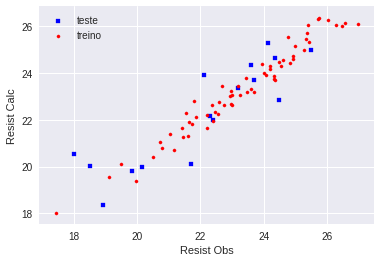

In [10]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)#mostra dois graficos sob o mesmo eixo 

ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Resist Calc')
plt.xlabel('Resist Obs')
plt.show()

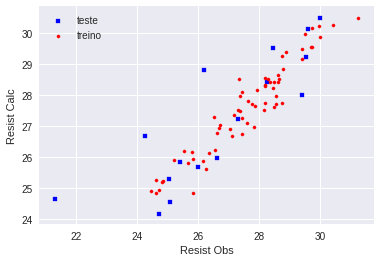

In [11]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)#mostra dois graficos sob o mesmo eixo 

ax1.scatter(resist_obs_test2,resist_calc_test2, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train2,resist_calc_train2, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Resist Calc')
plt.xlabel('Resist Obs')
plt.show()

In [12]:
get_params([deep])

NameError: ignored